In [1]:
# Importing all the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Understanding the Data

In [2]:
df=pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
# checking the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 2. Data Cleaning

In [6]:
#dropping Lead Number and Prospect ID beacuse of no use 

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [7]:
# Replacing Select with null values, since they're already selected
df =df.replace('Select', np.nan)

In [8]:
#checking null values in each rows
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [9]:
#checking percentage of null values in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
#dropping cols with more than 45% missing values
col=df.columns
for i in col:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [11]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# 3. EDA

## 3.1 Handling Missing Values & Imputing

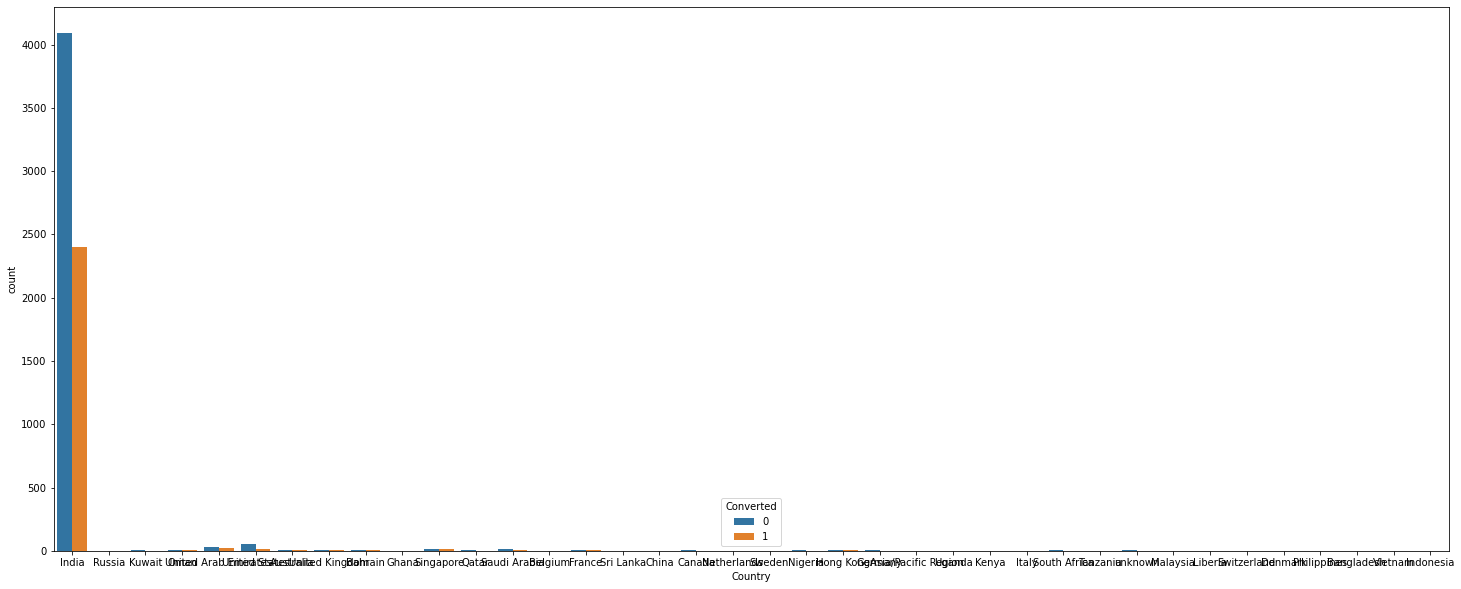

In [12]:
#plotting spread of Country columnn 
plt.figure(figsize=(25,10))
sns.countplot(df.Country, hue=df.Converted)
plt.show()

In [13]:
# Since India is the most common found among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')

In [14]:
# since india is mainly found here, so this column can be dropped
cols=['Country']

In [15]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

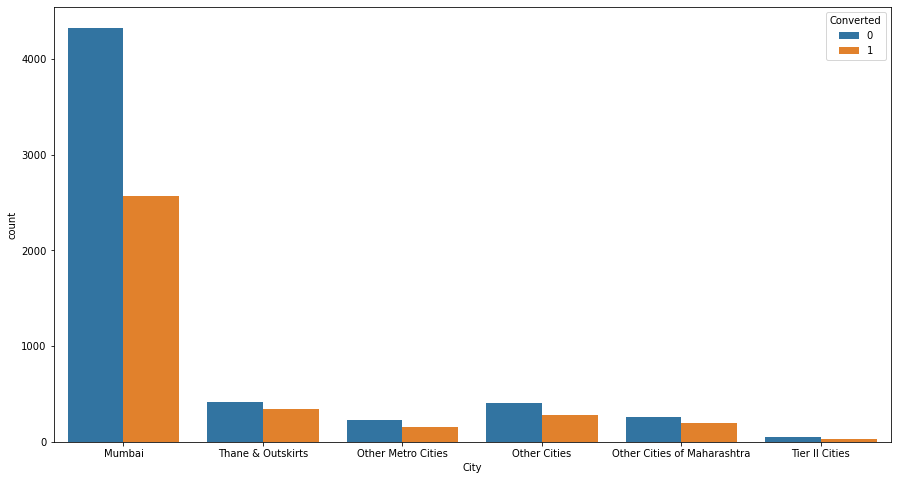

In [17]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(15,8))
sns.countplot(df.City, hue=df.Converted)
plt.show()

In [18]:
#checking value counts of Specialization feature

df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a student, so specialization yet. So we will replace NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

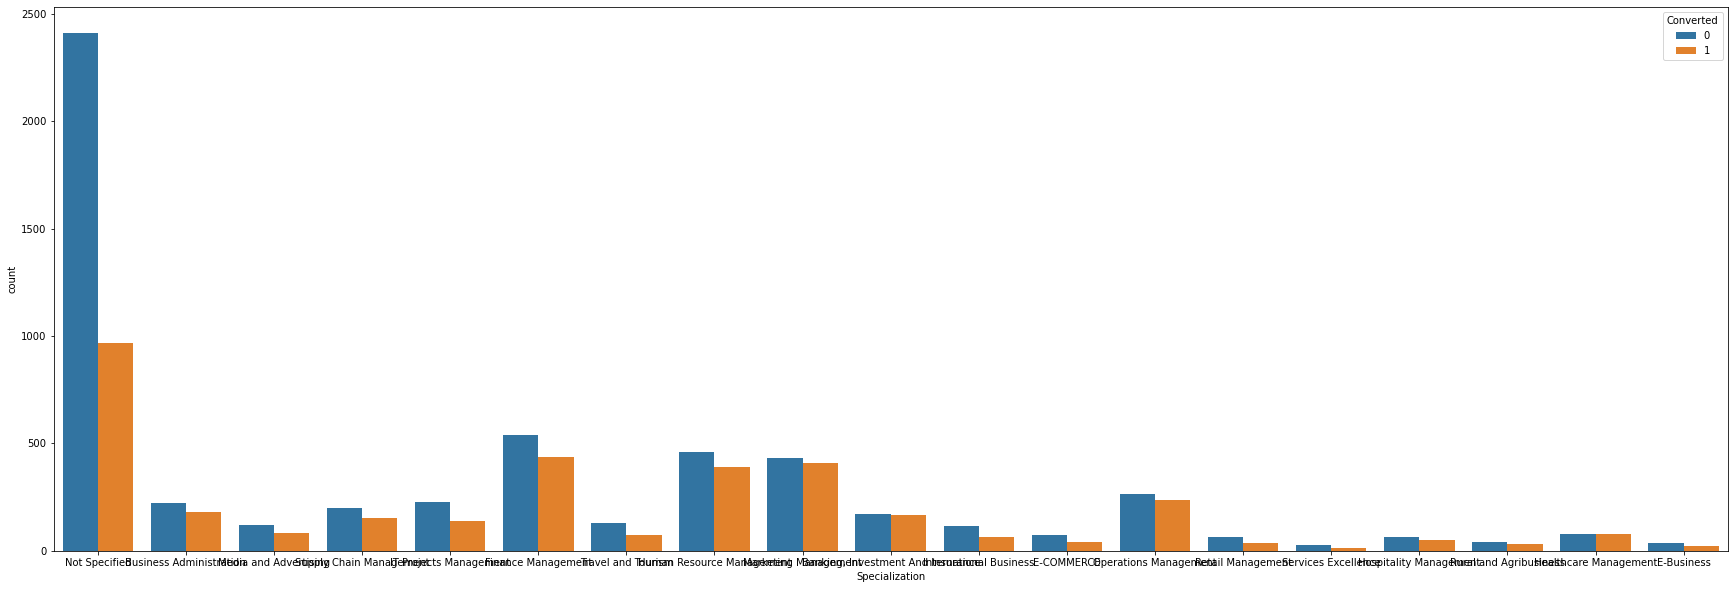

In [20]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(30,10))
s1=sns.countplot(df.Specialization, hue=df.Converted)
plt.show()

In [21]:
df.Specialization.value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# Management should be grouped here
df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management_Specializations')  

In [23]:
#What is your current occupation

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
#imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

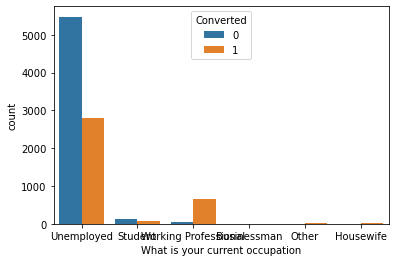

In [25]:
#visualizing count of Variable based on Converted value
sns.countplot(df['What is your current occupation'], hue=df.Converted)
plt.show()

In [26]:
#checking value counts
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
#replacing Nan values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

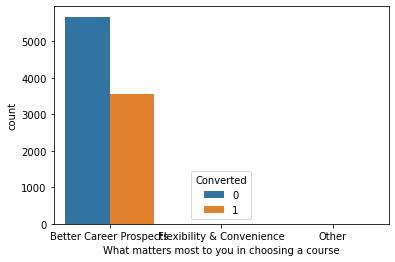

In [28]:
#visualizing count of Variable based on Converted value
sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
plt.show()


In [29]:
#checking value counts of variable
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
# 'What matters most to you in choosing a course' feature can be dropped

In [31]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [32]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

In [33]:
df['Tags'].value_counts()

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [34]:
#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number','wrong number given','Interested  in full time MBA'] , 'Other_Tags')

In [35]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [36]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')

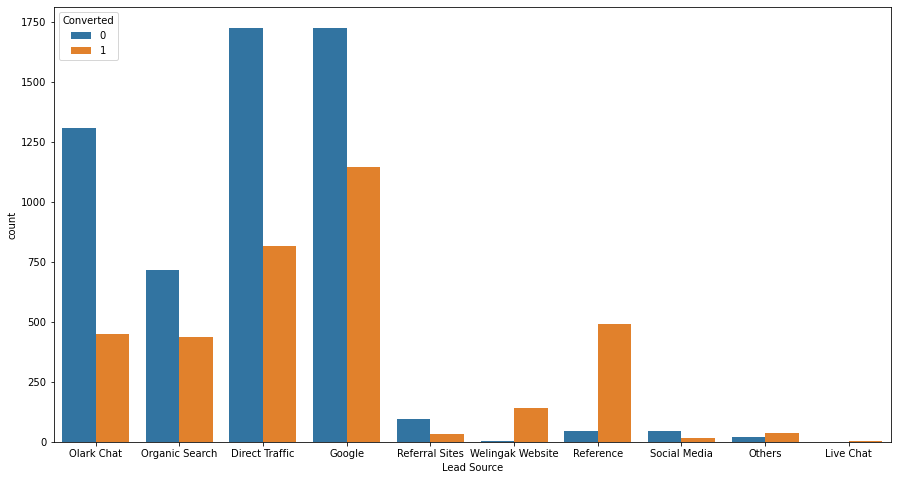

In [37]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,8))
sns.countplot(df['Lead Source'], hue=df.Converted)
plt.show()

In [38]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront',
                                                        'View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [40]:
# dropping other nan
df = df.dropna()

In [41]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [42]:
#checking value counts of Do Not Call
df['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [43]:
# so 'Do Not Call' feature can also we drop

In [44]:
#checking value counts for Do Not Email
df['Do Not Email'].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [45]:
df.Search.value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [46]:
df.Magazine.value_counts()

No    9103
Name: Magazine, dtype: int64

In [47]:
df['Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [48]:
df['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [49]:
df['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [50]:
df['Digital Advertisement'].value_counts()


No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [51]:
df['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [52]:
df['Receive More Updates About Our Courses'].value_counts()

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [53]:
df['Update me on Supply Chain Content'].value_counts()

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [54]:
df['Get updates on DM Content'].value_counts()

No    9103
Name: Get updates on DM Content, dtype: int64

In [55]:
df['I agree to pay the amount through cheque'].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [56]:
# all features which have vary long variation like above need to drop

In [57]:
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [58]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                       'Resubscribed to emails','View in browser link Clicked','Approached upfront', 'Form Submitted on Website','Email Received'],'Other_Notable_activity')

In [59]:
df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [60]:
drop_col=['Country','What matters most to you in choosing a course',
 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [61]:
df= df.drop(drop_col,axis=1)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [63]:
df.shape

(9103, 14)

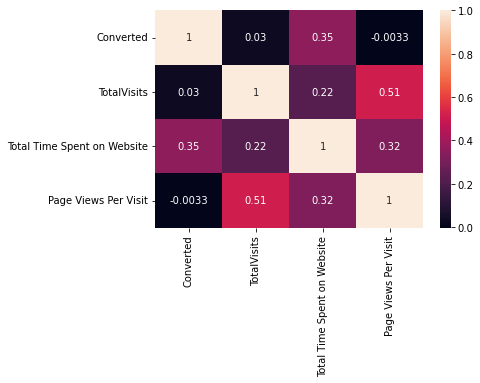

In [64]:
# checking corr
sns.heatmap(df.corr() ,annot=True)
plt.show()

## 3.2 Creating Dummy Variables for Categorical Columns/Data

In [65]:
# variables to map

list1=  ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[list1] = df[list1].apply(binary_map)

In [66]:
var2= pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df= pd.concat([df,var2],axis=1)

In [67]:
var3 = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
var3 = var3.drop(['Specialization_Not Specified'], 1)
df = pd.concat([df, var3], axis = 1)


In [68]:
var4 = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
var4 = var4.drop(['Lead Source_Others'], 1)
leads = pd.concat([df,var4], axis = 1)

In [69]:
var5 = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
var5 = var5.drop(['Last Activity_Others'], 1)
df = pd.concat([df, var5], axis = 1)

In [70]:
var6 = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
var6 = var6.drop(['Lead Source_Others'], 1)
df = pd.concat([df,var6], axis = 1)

In [71]:
var7 = pd.get_dummies(df['Tags'], prefix  = 'Tags')
var7 = var7.drop(['Tags_Not Specified'], 1)
df = pd.concat([df,var7], axis = 1)

In [72]:
var8 = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
var8 = var8.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df = pd.concat([df,var8], axis = 1)

In [73]:
a=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
df.drop(a,1,inplace = True)

In [74]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9103 non-null   int64  
 1   TotalVisits                                           9103 non-null   float64
 2   Total Time Spent on Website                           9103 non-null   int64  
 3   Page Views Per Visit                                  9103 non-null   float64
 4   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 6   Lead Origin_Lead Import                               9103 non-null   uint8  
 7   What is your current occupation_Housewife             9103 non-null   uint8  
 8   What is your current occupation_Other                 9103

# 4. Model Building

## 4.1 Train Test Split

In [76]:
from sklearn.model_selection import train_test_split
y = df['Converted']
X=df.drop('Converted', axis=1)

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [78]:
X_train.shape

(6372, 56)

In [79]:
y_train.shape

(6372,)

In [80]:
#scaling numeric columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7962,0.011952,0.570794,0.027273,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
5520,0.027888,0.026631,0.127273,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1962,0.019920,0.075011,0.045455,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1566,0.055777,0.550821,0.063636,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9170,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


## 4.2 Using statsmodels & sklearn to build the optimal model

In [81]:
import statsmodels.api as sm

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False])

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('What is your current occupation_Housewife', False, 25),
 ('What is your current occupation_Other', False, 36),
 ('What is your current occupation_Student', False, 21),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 6),
 ('City_Other Cities', False, 28),
 ('City_Other Cities of Maharashtra', False, 27),
 ('City_Other Metro Cities', False, 30),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 18),
 ('Specialization_Banking, Investment And Insurance', False, 26),
 ('Specialization_Business Administration', False, 37),
 ('Specialization_E-Business', False, 24),
 ('Specialization_E-COMMERCE', False, 16),
 ('Specialization_International Business', Fal

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Last Activity_Converted to Lead'

In [87]:
X_train=X_train[col]

In [88]:
X_train_sm = sm.add_constant(X_train)
lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.2
Date:                Sun, 16 Oct 2022   Deviance:                       2564.3
Time:                        13:51:16   Pearson chi2:                 8.19e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.9027      0.099    -19.171      0.000      -2.097      -1.708
TotalVisits                                       2.4629      2.197      1.121      0.262      -1.844       6.769
Total Time Spent on Website                       3.6200      0.218     16.613      0.000       3.193       4.047
Lead Origin_Lead Add Form                         1.5872      0.421      3.766      0.000       0.761       2.413
Last Activity_SMS Sent                            1.8528      0.112     16.516      0.000       1.633       2.073
Lead Source_Direct Traffic                       -0.6375      0.125     -5.099      0.000      -0.883      -0.392
Lead Source_Referral Sites                       -0.6180      0.489     -1.264      0.206      -1.576       0.340
Lead Source_Welingak Website                      3.2802      0.841      3.899      0.000       1.631       4.929
Tags_Closed by Horizzon                           6.5205      0.733      8.893      0.000       5.083       7.958
Tags_Interested in other courses                 -2.0046      0.370     -5.417      0.000      -2.730      -1.279
Tags_Lost to EINS                                 6.3993      0.730      8.769      0.000       4.969       7.830
Tags_Other_Tags                                  -2.4324      0.210    -11.591      0.000      -2.844      -2.021
Tags_Ringing                                     -3.5089      0.244    -14.404      0.000      -3.986      -3.031
Tags_Will revert after reading the email          4.4318      0.187     23.695      0.000       4.065       4.798
Last Notable Activity_Modified                   -1.6820      0.126    -13.349      0.000      -1.929      -1.435
Last Notable Activity_Olark Chat Conversation    -1.3244      0.410     -3.229      0.001      -2.128      -0.521
=================================================================================================================
"""

In [89]:
#dropping column with high p-value
X_train = X_train.drop('Lead Source_Referral Sites',axis=1)

In [90]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train)
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1283.0
Date:                Sun, 16 Oct 2022   Deviance:                       2566.1
Time:                        13:51:16   Pearson chi2:                 8.17e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.9114      0.100    -19.189      0.000      -2.107      -1.716
TotalVisits                                       2.0299      2.323      0.874      0.382      -2.523       6.583
Total Time Spent on Website                       3.6245      0.218     16.607      0.000       3.197       4.052
Lead Origin_Lead Add Form                         1.5914      0.421      3.777      0.000       0.766       2.417
Last Activity_SMS Sent                            1.8587      0.112     16.586      0.000       1.639       2.078
Lead Source_Direct Traffic                       -0.6260      0.125     -5.018      0.000      -0.870      -0.381
Lead Source_Welingak Website                      3.2823      0.841      3.902      0.000       1.634       4.931
Tags_Closed by Horizzon                           6.5278      0.733      8.904      0.000       5.091       7.965
Tags_Interested in other courses                 -2.0284      0.369     -5.491      0.000      -2.753      -1.304
Tags_Lost to EINS                                 6.4045      0.730      8.777      0.000       4.974       7.835
Tags_Other_Tags                                  -2.4297      0.210    -11.577      0.000      -2.841      -2.018
Tags_Ringing                                     -3.5029      0.244    -14.382      0.000      -3.980      -3.026
Tags_Will revert after reading the email          4.4318      0.187     23.696      0.000       4.065       4.798
Last Notable Activity_Modified                   -1.6802      0.126    -13.337      0.000      -1.927      -1.433
Last Notable Activity_Olark Chat Conversation    -1.3102      0.410     -3.199      0.001      -2.113      -0.507
=================================================================================================================
"""

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.05
11,Tags_Will revert after reading the email,1.79
2,Lead Origin_Lead Add Form,1.78
3,Last Activity_SMS Sent,1.54
0,TotalVisits,1.48
4,Lead Source_Direct Traffic,1.44
12,Last Notable Activity_Modified,1.41
5,Lead Source_Welingak Website,1.36
9,Tags_Other_Tags,1.28
6,Tags_Closed by Horizzon,1.27


In [93]:
# Getting the Predicted values on the train set
y_train_pred = lr2.predict(X_train_sm)
y_train_pred[:10]


7962    0.403908
5520    0.084384
1962    0.020833
1566    0.990340
9170    0.012855
5097    0.128825
8954    0.028564
309     0.951843
5519    0.486839
1050    0.986460
dtype: float64

In [94]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.40390764, 0.08438399, 0.02083297, 0.99034018, 0.01285542,
       0.12882481, 0.02856446, 0.95184308, 0.48683944, 0.98646028])

In [95]:
y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index,'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,7962,0,0.403908
1,5520,0,0.084384
2,1962,0,0.020833
3,1566,1,0.990340
4,9170,0,0.012855


In [96]:
# Let's create columns with different probability cutoffs 
count = [float(x)/10 for x in range(10)]
for i in count:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Prospect ID,Converted,Converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,7962,0,0.403908,1,1,1,1,1,0,0,0,0,0
1,5520,0,0.084384,1,0,0,0,0,0,0,0,0,0
2,1962,0,0.020833,1,0,0,0,0,0,0,0,0,0
3,1566,1,0.990340,1,1,1,1,1,1,1,1,1,1
4,9170,0,0.012855,1,0,0,0,0,0,0,0,0,0


In [97]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
df3=pd.DataFrame(columns=["prob","accu","pre","recall"])

In [98]:
for i in count:
  a=accuracy_score(y_train_pred_final["Converted"],y_train_pred_final[i])
  p=precision_score(y_train_pred_final["Converted"],y_train_pred_final[i])
  r=recall_score(y_train_pred_final["Converted"],y_train_pred_final[i])
  df3.loc[i]=[i,a,p,r]

In [99]:
df3.head()

,prob,accu,pre,recall
0.0,0.0,0.379630,0.379630,1.000000
0.1,0.1,0.814658,0.677669,0.976023
0.2,0.2,0.902856,0.832594,0.931377
0.3,0.3,0.922787,0.885554,0.914841
0.4,0.4,0.925298,0.902277,0.900785


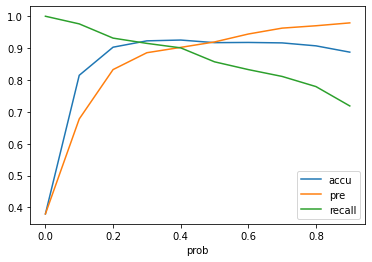

In [100]:
df3.plot.line(x="prob",y=["accu","pre","recall"])
plt.show()

In [101]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Prospect ID,Converted,Converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,7962,0,0.403908,1,1,1,1,1,0,0,0,0,0,1
1,5520,0,0.084384,1,0,0,0,0,0,0,0,0,0,0
2,1962,0,0.020833,1,0,0,0,0,0,0,0,0,0,0
3,1566,1,0.990340,1,1,1,1,1,1,1,1,1,1,1
4,9170,0,0.012855,1,0,0,0,0,0,0,0,0,0,0


In [102]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.403908,7962,1,40
1,0,0.084384,5520,0,8
2,0,0.020833,1962,0,2
3,1,0.990340,1566,1,99
4,0,0.012855,9170,0,1


## 4.3 Checking Model Performance

In [103]:
print("precision",precision_score(y_train,y_train_pred_final["final_Predicted"]))

precision 0.8855542216886755


In [104]:
print("recall",recall_score(y_train,y_train_pred_final["final_Predicted"]))

recall 0.9148408433236874


In [105]:
print("accuracy",accuracy_score(y_train,y_train_pred_final["final_Predicted"]))

accuracy 0.9227871939736346


In [106]:
 from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3667,  286],
       [ 206, 2213]], dtype=int64)

In [107]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [108]:
# Calculating the sensitivity
TP/(TP+FN)

0.9148408433236874

In [109]:
# Calculating the specificity
TN/(TN+FP)

0.9276498861624083

## 4.4 Checking ROC Curve

In [110]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [111]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

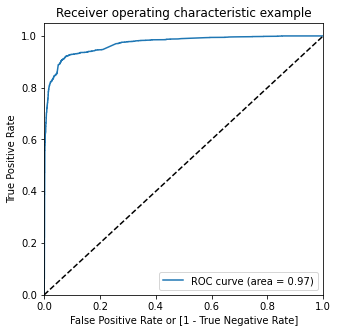

In [112]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## 4.5 Scaling Test Dataset

In [113]:
col=X_train.columns
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [114]:
col=X_train.columns

In [115]:
X_test = X_test[col]

In [116]:
coln=X_test.columns

In [117]:

X_test[coln] = scaler.fit_transform(X_test[coln])
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3504,0.021277,0.186620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4050,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7201,0.014184,0.313380,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1196,0.028369,0.186180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8219,0.049645,0.108715,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 5. Performing on Test Dataset

In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
y_test_pred = lr2.predict(X_test_sm)

In [120]:
X_test.describe()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
count,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000
mean,0.023998,0.212598,0.064445,0.302087,0.288539,0.011351,0.029293,0.046137,0.016477,0.147199,0.134749,0.232882,0.363237,0.017576
std,0.030446,0.239435,0.245589,0.459247,0.453166,0.105955,0.168658,0.209820,0.127326,0.354369,0.341518,0.422745,0.481020,0.131428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007092,0.003521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.021277,0.108715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.035461,0.405370,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
y_pred_test = pd.DataFrame(y_test_pred)

In [122]:
y_test_df = pd.DataFrame(y_test)


In [123]:
y_test_df['Prospect ID'] = y_test_df.index
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.009061
1,1,4050,0.997454
2,0,7201,0.125248
3,0,1196,0.009176
4,1,8219,0.987407


In [124]:
y_pred_final=y_pred_final.rename(columns={0:"prob"})

In [125]:
y_pred_final

,Converted,Prospect ID,prob
0,0,3504,0.009061
1,1,4050,0.997454
2,0,7201,0.125248
3,0,1196,0.009176
4,1,8219,0.987407
...,...,...,...
2726,0,6508,0.017882
2727,0,315,0.006602
2728,0,3766,0.155843
2729,1,8043,0.855570


In [126]:
y_pred_final['final_Predicted'] = y_pred_final.prob.map( lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()

,Converted,Prospect ID,prob,final_Predicted
0,0,3504,0.009061,0
1,1,4050,0.997454,1
2,0,7201,0.125248,0
3,0,1196,0.009176,0
4,1,8219,0.987407,1


In [127]:
print("precision",precision_score(y_test,y_pred_final['final_Predicted']))

precision 0.8923933209647495


In [128]:
print("recall",recall_score(y_test,y_pred_final['final_Predicted']))

recall 0.9232245681381958


In [129]:
print("accuracy",accuracy_score(y_test,y_pred_final['final_Predicted']))

accuracy 0.9282314170633468


In [130]:
confusion = confusion_matrix(y_pred_final.Converted, y_pred_final['final_Predicted'] )
confusion

array([[1573,  116],
       [  80,  962]], dtype=int64)

In [131]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [132]:
# Calculating the sensitivity
TP/(TP+FN)

0.9232245681381958

In [133]:
# Calculating the specificity
TN/(TN+FP)

0.931320307874482

## Training Dataset Metrics: 

Accuracy : 92.27%
Precision : 88.55%
Recall    : 91.48%
Sensitivity : 91.48%
Specificity : 92.76%

## Test Dataset Metrics:

Accuracy : 92.82%
Precision : 89.23%
Recall    : 92.32%
Sensitivity : 92.32%
Specificity : 93.13%

## This concludes that the model built using the train dataset has been successful on the test dataset